<a href="https://colab.research.google.com/github/AI-Junction/Personalized-Medicine/blob/master/PersonalizedMedRedCancerTreatVer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer



In [4]:
pwd = os.getcwd()
print(pwd)
dirname = os.path.join(pwd, "AllPersonalizedMedicineData")
print(dirname)


/content
/content/AllPersonalizedMedicineData


In [5]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 245kB 6.9MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [6]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [8]:
!ls -lha kaggle.json

---x-wx--T 1 root root 65 Dec  3 08:27 kaggle.json


In [38]:
os.path.isdir("/root/.kaggle")

True

In [39]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# get all kaggle competitions list
#!kaggle competitions list

In [0]:
# to list all datasets from kaggle
#!kaggle datasets list

In [0]:
# To list data files in a competition
#!kaggle competitions files -c titanic

In [0]:
# how to download a file to content folder in colab
#!kaggle datasets download -d stackoverflow/stack-overflow-2018-developer-survey

In [0]:
# how to unzip a file to destination folder
#!unzip stack-overflow-2018-developer-survey.zip -d stack-overflow-2018-developer-survey

In [0]:
#from subprocess import check_output
#print(check_output(["ls", "/content/stack-overflow-2018-developer-survey"]).decode("utf8"))

In [0]:
#!head ~/.kaggle/datasets/stackoverflow/stack-overflow-2018-developer-survey/survey_results_public.csv
#!head /content/stack-overflow-2018-developer-survey/survey_results_public.csv

In [0]:
# trial code only
#!ls "/content/drive/My Drive/Machine Learning/All ML Datasets"

In [44]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!kaggle competitions files -c msk-redefining-cancer-treatment

name                             size  creationDate         
-------------------------------  ----  -------------------  
training_variants.zip            24KB  2017-06-22 22:42:33  
test_variants.zip                47KB  2017-06-22 22:42:33  
training_text.zip                60MB  2017-06-22 22:42:59  
test_text.zip                    99MB  2017-06-22 22:43:13  
stage2_sample_submission.csv.7z  765B  2017-09-26 00:21:29  
stage2_test_variants.csv.7z       7KB  2017-09-26 00:21:29  
stage2_test_text.csv.7z           9MB  2017-09-26 00:21:30  
stage1_solution_filtered.csv.7z   1KB  2017-09-26 01:49:00  
stage_2_private_solution.csv.7z  592B  2017-10-13 22:04:01  


In [0]:
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"
#KAGGLE_CONFIG_DIR=/content/.kaggle

In [0]:
# to transfer files directly from kaggle competition to google drive. 
if not os.path.isfile("drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_variants.zip"):
  !kaggle competitions download -c msk-redefining-cancer-treatment -f training_variants -p "/content/drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !kaggle competitions download -c msk-redefining-cancer-treatment -f test_variants -p "/content/drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !kaggle competitions download -c msk-redefining-cancer-treatment -f training_text -p "/content/drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !kaggle competitions download -c msk-redefining-cancer-treatment -f test_text -p "/content/drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"

In [0]:
# trial only
# titanic_dir = "/content/drive/My Drive/Machine Learning/All ML Datasets"
# print(os.path.join(titanic_dir, "titanic_train.csv"))


In [0]:
# trial only
# titanic_train_df = pd.read_csv(os.path.join(titanic_dir, "titanic_train.csv"))


In [0]:
# trial only
# titanic_train_df.head()

In [0]:
#dir = "/content/drive/My Drive/Machine Learning/All ML Datasets/AllPersonalizedMedicineData"
#!unzip "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_variants.zip"

'''
training_variants.zip            24KB  2017-06-22 22:42:33  
test_variants.zip                47KB  2017-06-22 22:42:33  
training_text.zip                60MB  2017-06-22 22:42:59  
test_text.zip                    99MB  2017-06-22 22:43:13  
'''
if not os.path.isfile("drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_variants"):
  !unzip "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_variants.zip" -d "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !unzip "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/test_variants.zip" -d "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !unzip "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_text.zip" -d "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"
  !unzip "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/test_text.zip" -d "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"


In [0]:
# import os.path
# os.path.isfile("drive/My Drive/All ML Datasets/AllPersonalizedMedicineData/training_variants.zip") 
# os.path.isdir(dir)
# print(os.path.exists("drive/My Drive/Machine Learning/All ML Datasets/AllPersonalizedMedicineData/training_variants"))

In [48]:
!ls "/content/drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"

test_text      test_variants	  training_text      training_variants
test_text.zip  test_variants.zip  training_text.zip  training_variants.zip


In [0]:
!ls "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"

training_variants  training_variants.zip


In [0]:
dirname = "drive/My Drive/All ML Datasets/AllPersonalizedMedicineData"

In [50]:
train_variants_df = pd.read_csv(os.path.join(dirname, "training_variants"))
test_variants_df = pd.read_csv(os.path.join(dirname, "test_variants"))
train_text_df = pd.read_csv(os.path.join(dirname, "training_text"), sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
test_text_df = pd.read_csv(os.path.join(dirname, "test_text"), sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
print("Train Variant".ljust(15), train_variants_df.shape)
print("Train Text".ljust(15), train_text_df.shape)
print("Test Variant".ljust(15), test_variants_df.shape)
print("Test Text".ljust(15), test_text_df.shape)    


Train Variant   (3321, 4)
Train Text      (3321, 2)
Test Variant    (5668, 3)
Test Text       (5668, 2)


In [51]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [0]:
#export KAGGLE_USERNAME=cpattekar
#export KAGGLE_KEY=af37bff66adaf8e646c1b35bec1ff209

In [54]:
print("For training data, there are a total of", len(train_variants_df.ID.unique()), "IDs,", end='')
print(len(train_variants_df.Gene.unique()), "unique genes,", end='')
print(len(train_variants_df.Variation.unique()), "unique variations and ", end='')
print(len(train_variants_df.Class.unique()),  "classes")

For training data, there are a total of 3321 IDs,264 unique genes,2996 unique variations and 9 classes


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


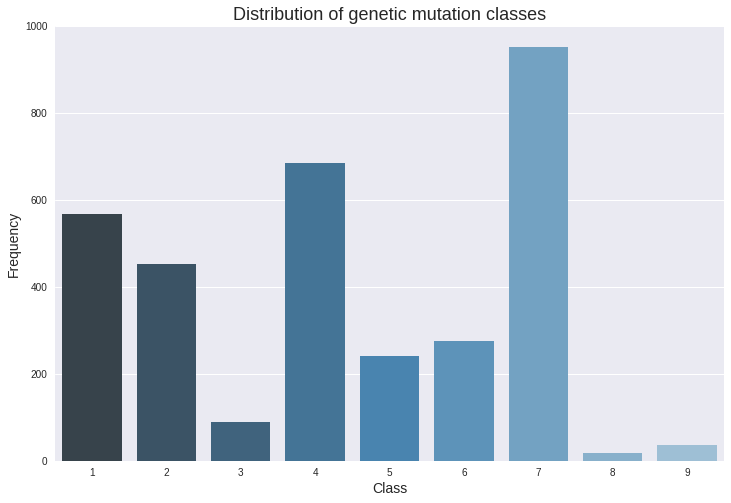

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=train_variants_df, palette="Blues_d")
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()


In [56]:
gene_group = train_variants_df.groupby("Gene")['Gene'].count()
minimal_occ_genes = gene_group.sort_values(ascending=True)[:10]
print("Genes with maximal occurences\n", gene_group.sort_values(ascending=False)[:10])
print("\nGenes with minimal occurences\n", minimal_occ_genes)

Genes with maximal occurences
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

Genes with minimal occurences
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


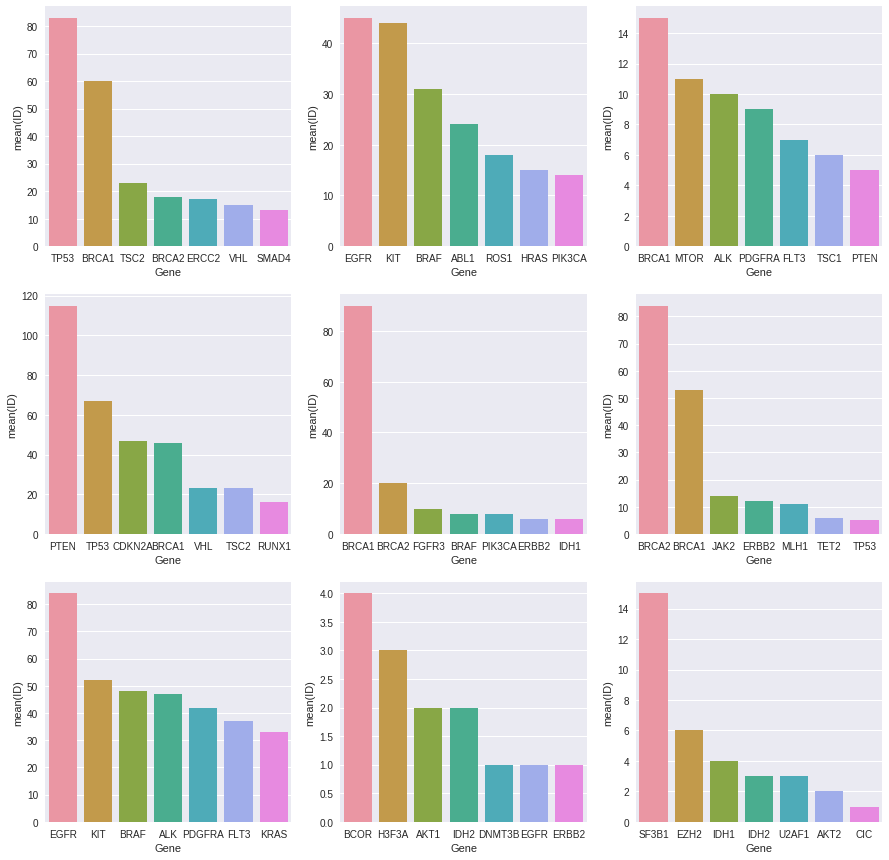

In [57]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = train_variants_df[train_variants_df["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])
